<a href="https://colab.research.google.com/github/AgentMrBig/python-for-finance/blob/master/machine_learning_finance_staging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np 
import pandas as pd
from datetime import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
import finnhub

In [7]:
# api_key ommitted, use your own api key from https://finnhub.io/ its free
finnhub_client = finnhub.Client(api_key="********************")

In [109]:
# Dates for date range when getting stock/forex candles
# strftime.org for pythons strftime directives
fromTime = 'Dec 25, 2019'
toTime = 'Oct 20, 2020'

In [110]:
# Convert strings to datetime.datetime
fromTime_obj = datetime.strptime(fromTime, '%b %d, %Y')
toTime_obj = datetime.strptime(toTime, '%b %d, %Y')
print(type(fromTime_obj))

<class 'datetime.datetime'>


In [111]:
# Convert datetime.datetime to timestamp
# first I convert to timestamp, it has .0 trailing decimal
# next I remove the dec by converting from float to int
fromTime_stamp = datetime.timestamp(fromTime_obj)
fromTime_stamp = int(fromTime_stamp)
print(fromTime_stamp)

toTime_stamp = datetime.timestamp(toTime_obj)
toTime_stamp = int(toTime_stamp)
print(toTime_stamp)

1577232000
1603152000


In [113]:
# Confirming desired dates
print('date from ', datetime.fromtimestamp(int("1577232000")).strftime('%Y-%m-%d %H:%M:%S'))
print('date to ', datetime.fromtimestamp(int("1603152000")).strftime('%Y-%m-%d %H:%M:%S'))

date from  2019-12-25 00:00:00
date to  2020-10-20 00:00:00


In [114]:
# api call to https://finnhub.io/ getting daily stock candles for netflix 
# in a specified date range
nflxData = finnhub_client.stock_candles('nflx', 'D', fromTime_stamp, toTime_stamp)

In [115]:
# pandas dataframe
df = pd.DataFrame(nflxData)

In [116]:
display(df)

,c,h,l,o,s,t,v
0,332.63,336.46,332.01,334.60,ok,1577370600,3589900
1,329.09,333.82,326.01,332.96,ok,1577457000,5036100
2,323.31,329.19,322.86,329.08,ok,1577716200,4311500
3,323.57,324.92,321.09,322.00,ok,1577802600,3713300
4,329.81,329.98,324.78,326.10,ok,1577975400,4485800
...,...,...,...,...,...,...,...
201,554.09,557.65,537.20,540.56,ok,1602595800,5602500
202,541.45,572.49,541.00,562.61,ok,1602682200,9510100
203,541.94,551.22,535.10,545.52,ok,1602768600,5113100
204,530.79,554.33,530.03,549.50,ok,1602855000,6347400


In [117]:
#Get the number of trading days in dataset
df.shape

(206, 7)

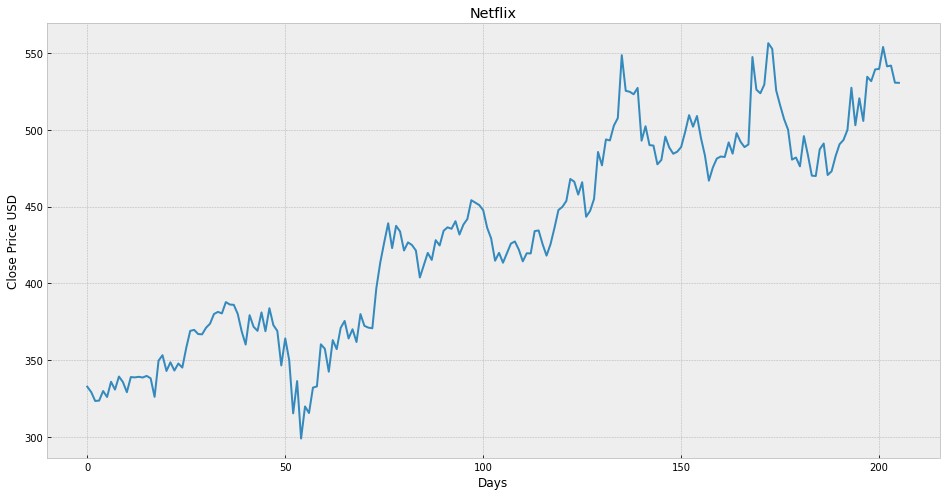

In [118]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['c'])
plt.show()

In [119]:
# Get close price
df = df[['c']]
df.head(100)

,c
0,332.63
1,329.09
2,323.31
3,323.57
4,329.81
...,...
95,438.27
96,441.95
97,454.19
98,452.58


In [120]:
# create a variable to predict 'x' days out into the future
future_days = 25
# Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['c']].shift(-future_days)
df.head(100)

,c,Prediction
0,332.63,358.00
1,329.09,369.01
2,323.31,369.67
3,323.57,366.95
4,329.81,366.77
...,...,...
95,438.27,449.87
96,441.95,453.72
97,454.19,468.04
98,452.58,466.26


In [121]:
#Create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[332.63]
 [329.09]
 [323.31]
 [323.57]
 [329.81]
 [325.9 ]
 [335.83]
 [330.75]
 [339.26]
 [335.66]
 [329.05]
 [338.92]
 [338.69]
 [339.07]
 [338.62]
 [339.67]
 [338.11]
 [326.  ]
 [349.6 ]
 [353.16]
 [342.88]
 [348.52]
 [343.16]
 [347.74]
 [345.09]
 [358.  ]
 [369.01]
 [369.67]
 [366.95]
 [366.77]
 [371.07]
 [373.69]
 [380.01]
 [381.4 ]
 [380.4 ]
 [387.78]
 [386.19]
 [386.  ]
 [380.07]
 [368.7 ]
 [360.09]
 [379.24]
 [371.71]
 [369.03]
 [381.05]
 [368.77]
 [383.79]
 [372.78]
 [368.97]
 [346.49]
 [364.13]
 [349.92]
 [315.25]
 [336.3 ]
 [298.84]
 [319.75]
 [315.47]
 [332.03]
 [332.83]
 [360.27]
 [357.32]
 [342.39]
 [362.99]
 [357.12]
 [370.96]
 [375.5 ]
 [364.08]
 [370.08]
 [361.76]
 [379.96]
 [372.28]
 [371.12]
 [370.72]
 [396.72]
 [413.55]
 [426.75]
 [439.17]
 [422.96]
 [437.49]
 [433.83]
 [421.42]
 [426.7 ]
 [424.99]
 [421.38]
 [403.83]
 [411.89]
 [419.85]
 [415.27]
 [428.15]
 [424.68]
 [434.26]
 [436.53]
 [435.55]
 [440.52]
 [431.82]
 [438.27]
 [441.95]
 [454.19]
 [452.58]
 [451.04]


In [122]:
# Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[358.   369.01 369.67 366.95 366.77 371.07 373.69 380.01 381.4  380.4
 387.78 386.19 386.   380.07 368.7  360.09 379.24 371.71 369.03 381.05
 368.77 383.79 372.78 368.97 346.49 364.13 349.92 315.25 336.3  298.84
 319.75 315.47 332.03 332.83 360.27 357.32 342.39 362.99 357.12 370.96
 375.5  364.08 370.08 361.76 379.96 372.28 371.12 370.72 396.72 413.55
 426.75 439.17 422.96 437.49 433.83 421.42 426.7  424.99 421.38 403.83
 411.89 419.85 415.27 428.15 424.68 434.26 436.53 435.55 440.52 431.82
 438.27 441.95 454.19 452.58 451.04 447.67 436.25 429.32 414.77 419.89
 413.44 419.73 425.92 427.31 421.97 414.33 419.6  419.49 434.05 434.48
 425.56 418.07 425.5  436.13 447.77 449.87 453.72 468.04 466.26 457.85
 465.91 443.4  447.24 455.04 485.64 476.89 493.81 493.16 502.78 507.76
 548.73 525.5  524.88 523.26 527.39 492.99 502.41 490.1  489.82 477.58
 480.45 495.65 488.51 484.48 485.8  488.88 498.62 509.64 502.11 509.08
 494.73 483.38 466.93 475.47 481.33 482.68 482.35 491.87 484.53 497.9
 492.31 

In [123]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [124]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [125]:
# Get the las 'x' rows of the feature data set
x_future = df.drop(['Prediction'],1)[-future_days:]
x_futrue = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[495.99],
       [483.86],
       [470.2 ],
       [469.96],
       [487.35],
       [491.17],
       [470.61],
       [473.08],
       [482.88],
       [490.65],
       [493.48],
       [500.03],
       [527.51],
       [503.06],
       [520.65],
       [505.87],
       [534.66],
       [531.79],
       [539.44],
       [539.81],
       [554.09],
       [541.45],
       [541.94],
       [530.79],
       [530.72]])

In [126]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print('Decision tree predictions ',tree_prediction)
print()
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print('Linear regression predictions ',lr_prediction)

Decision tree predictions  [482.88 495.99 488.51 488.51 556.55 470.61 488.51 470.2  495.99 547.53
 466.93 541.45 497.9  488.81 484.53 481.33 505.87 505.87 527.51 527.51
 531.79 527.51 527.51 505.87 505.87]

Linear regression predictions  [499.10491559 489.96300092 479.66798408 479.48710531 492.59327975
 495.47226689 479.97698532 481.83852936 489.2244126  495.08036288
 497.21322508 502.14970827 522.86032781 504.43330278 517.69020954
 506.55109175 528.24900793 526.08599926 531.85151016 532.13036494
 542.89265194 533.36636989 533.73566405 525.33233771 525.2795814 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


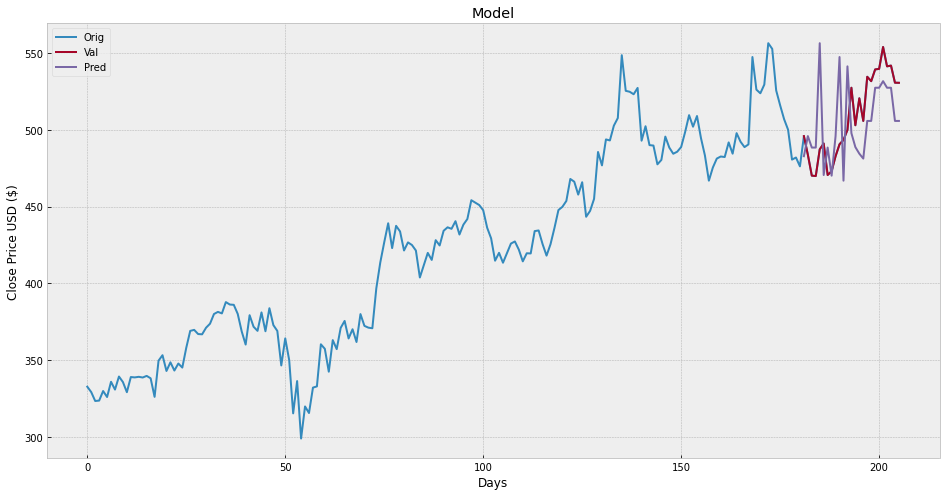

In [127]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['c'])
plt.plot(valid[['c', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


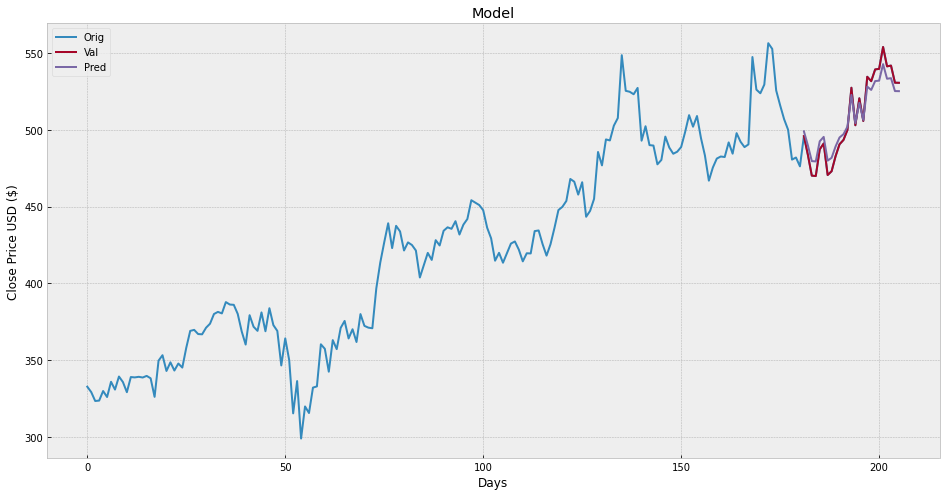

In [128]:
# Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['c'])
plt.plot(valid[['c', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()